## if 'WAR' numbers of players are the same, which players should I recruit?

### Creating an alternative to 'WAR'
This project will aim to create a linear regression model that weighs other metrics as features in order to predict our own 'WAR' metric. This model will be especially useful in evaluating and comparing players of the same 'WAR' value. For example, Mookie Betts and Ronald Acuña Jr. are both league leaders with an impressive 8.3. If they were both availble to be recruited, who would we pick?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# import data 
df_origin = pd.read_csv('batting_2023_data.csv', low_memory=False)

In [3]:
df = df_origin.copy()

# Explorative Data Analysis

In [7]:
# Number of rows and columns of the data
df.shape

(461, 105)

In [8]:
# Head and tail of dataset
# Set display options to show all columns
pd.set_option('display.max_columns', None)
df

,Name,Team,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,BB%,K%,BB/K,OBP,SLG,OPS,ISO,Spd,BABIP,UBR,wGDP,wSB,wRC,wRAA,wOBA,wRC+,GB/FB,LD%,GB%,Flyball%,IFFB%,HR/FB,IFH,IFH%,BUH,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,batted ball,EV,maxEV,LA,Barrels,Barrel%,HardHit,HardHit%,xBA,xSLG,xwOBA,Clutch,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,CStr%,CSW%,wFB,wSL,wCT,wCB,wCH,wSF,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,fastball%,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,Batting,Base Running,Fielding,WAR
0,Zack Short,DET,112,221,253,45,29,9,0,7,17,33,28,0,66,0,1,3,3,5,0,0.204,0.111,0.261,0.42,0.292,0.339,0.631,0.136,3.3,0.255,-1.8,0.6,0.6,23,-7.8,0.281,76,0.71,0.163,0.346,0.490,0.120,0.093,2,0.038,2,0.333,0.459,0.333,0.208,0.182,0.509,0.308,159,87.6,107.0,21.2,14,0.088,52,0.327,0.211,0.359,0.296,0.09,0.199,0.680,0.416,0.527,0.854,0.768,0.451,0.628,0.096,0.190,0.286,-7.1,4.5,-2.2,-0.5,-2.3,-0.1,-1.26,1.86,-3.41,-0.72,-3.20,-1.45,0.553,93.6,0.236,84.4,0.061,88.8,0.073,79.1,0.071,84.8,0.006,86.8,-7.4,-0.6,-4.1,-0.2
1,Zack Gelof,OAK,69,270,300,72,37,20,1,14,40,32,26,1,82,3,1,0,5,14,2,0.267,0.087,0.273,0.32,0.337,0.504,0.840,0.237,5.8,0.331,2.1,-0.3,1.5,46,9.6,0.357,133,1.22,0.255,0.410,0.335,0.032,0.222,5,0.065,1,1.000,0.466,0.349,0.185,0.122,0.513,0.365,189,89.8,108.5,11.8,21,0.111,77,0.407,0.250,0.443,0.333,-0.26,0.325,0.735,0.502,0.563,0.747,0.679,0.432,0.640,0.161,0.142,0.303,9.3,2.9,-1.5,-0.6,-3.7,1.5,1.68,1.12,-2.38,-0.50,-2.58,7.08,0.482,94.0,0.222,84.4,0.054,88.2,0.100,79.8,0.123,85.5,0.018,85.6,11.9,3.3,2.5,2.9
2,Zach Remillard,CHW,54,147,160,37,29,7,0,1,16,18,8,1,48,1,0,4,3,4,3,0.252,0.050,0.300,0.17,0.295,0.320,0.615,0.068,3.8,0.367,2.7,0.0,-0.8,13,-6.4,0.270,67,1.71,0.183,0.516,0.301,0.250,0.036,5,0.104,4,0.400,0.408,0.408,0.184,0.165,0.592,0.243,103,85.7,102.3,11.9,1,0.010,21,0.204,0.199,0.240,0.218,1.16,0.297,0.642,0.456,0.424,0.829,0.687,0.461,0.625,0.142,0.192,0.334,-3.2,-2.7,-1.1,-0.3,1.3,-0.3,-1.03,-1.98,-4.45,-0.52,2.96,-4.20,0.539,93.8,0.237,83.6,0.043,89.3,0.092,79.8,0.078,84.4,0.010,85.2,-6.2,1.9,0.2,0.2
3,Zach Neto,LAA,84,289,329,65,39,17,0,9,38,34,20,0,77,16,3,1,5,5,1,0.225,0.061,0.234,0.26,0.308,0.377,0.685,0.152,4.3,0.272,-0.4,0.0,0.0,36,-4.4,0.302,89,0.91,0.206,0.379,0.416,0.079,0.101,5,0.062,0,0.000,0.468,0.282,0.250,0.125,0.560,0.315,216,89.1,109.9,14.5,19,0.088,86,0.398,0.226,0.400,0.314,-0.03,0.298,0.701,0.474,0.525,0.840,0.728,0.436,0.623,0.129,0.161,0.290,-0.1,-4.9,1.7,1.3,-2.3,0.7,-0.02,-1.24,1.83,1.08,-4.11,2.10,0.459,94.5,0.305,84.2,0.072,88.8,0.094,80.9,0.043,86.1,0.026,87.0,-4.5,-0.4,0.8,1.1
4,Zach McKinstry,DET,148,464,518,107,73,21,4,9,60,35,44,0,113,5,3,2,3,16,6,0.231,0.085,0.218,0.39,0.302,0.351,0.654,0.121,6.0,0.284,0.9,1.1,-0.3,50,-12.7,0.289,81,0.82,0.218,0.351,0.431,0.039,0.059,8,0.065,0,0.000,0.354,0.376,0.270,0.124,0.601,0.275,356,87.2,108.3,17.8,27,0.076,118,0.332,0.245,0.389,0.311,-0.15,0.305,0.691,0.470,0.669,0.909,0.820,0.427,0.575,0.085,0.165,0.250,-5.0,-2.7,-0.3,1.3,-1.0,-1.9,-0.45,-0.80,-0.22,0.64,-0.38,-3.71,0.522,94.1,0.162,84.2,0.065,89.5,0.096,80.0,0.130,86.3,0.025,87.3,-11.8,1.7,4.5,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Adley Rutschman,BAL,154,588,687,163,111,31,1,20,84,80,92,6,101,2,5,0,14,1,2,0.277,0.134,0.147,0.91,0.374,0.435,0.809,0.158,1.8,0.303,0.3,-1.1,-2.2,103,19.0,0.352,127,1.22,0.232,0.423,0.346,0.076,0.118,14,0.067,0,0.000,0.384,0.323,0.293,0.163,0.539,0.299,492,88.4,111.1,12.6,37,0.075,189,0.384,0.290,0.466,0.373,0.66,0.270,0.620,0.410,0.771,0.924,0.863,0.400,0.560,0.056,0.201,0.257,14.0,-0.2,-1.3,-0.1,3.5,3.1,1.03,-0.04,-0.62,-0.03,0.7

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Columns: 105 entries, Name to WAR
dtypes: float64(77), int64(26), object(2)
memory usage: 378.3+ KB


<Axes: xlabel='WAR', ylabel='count'>

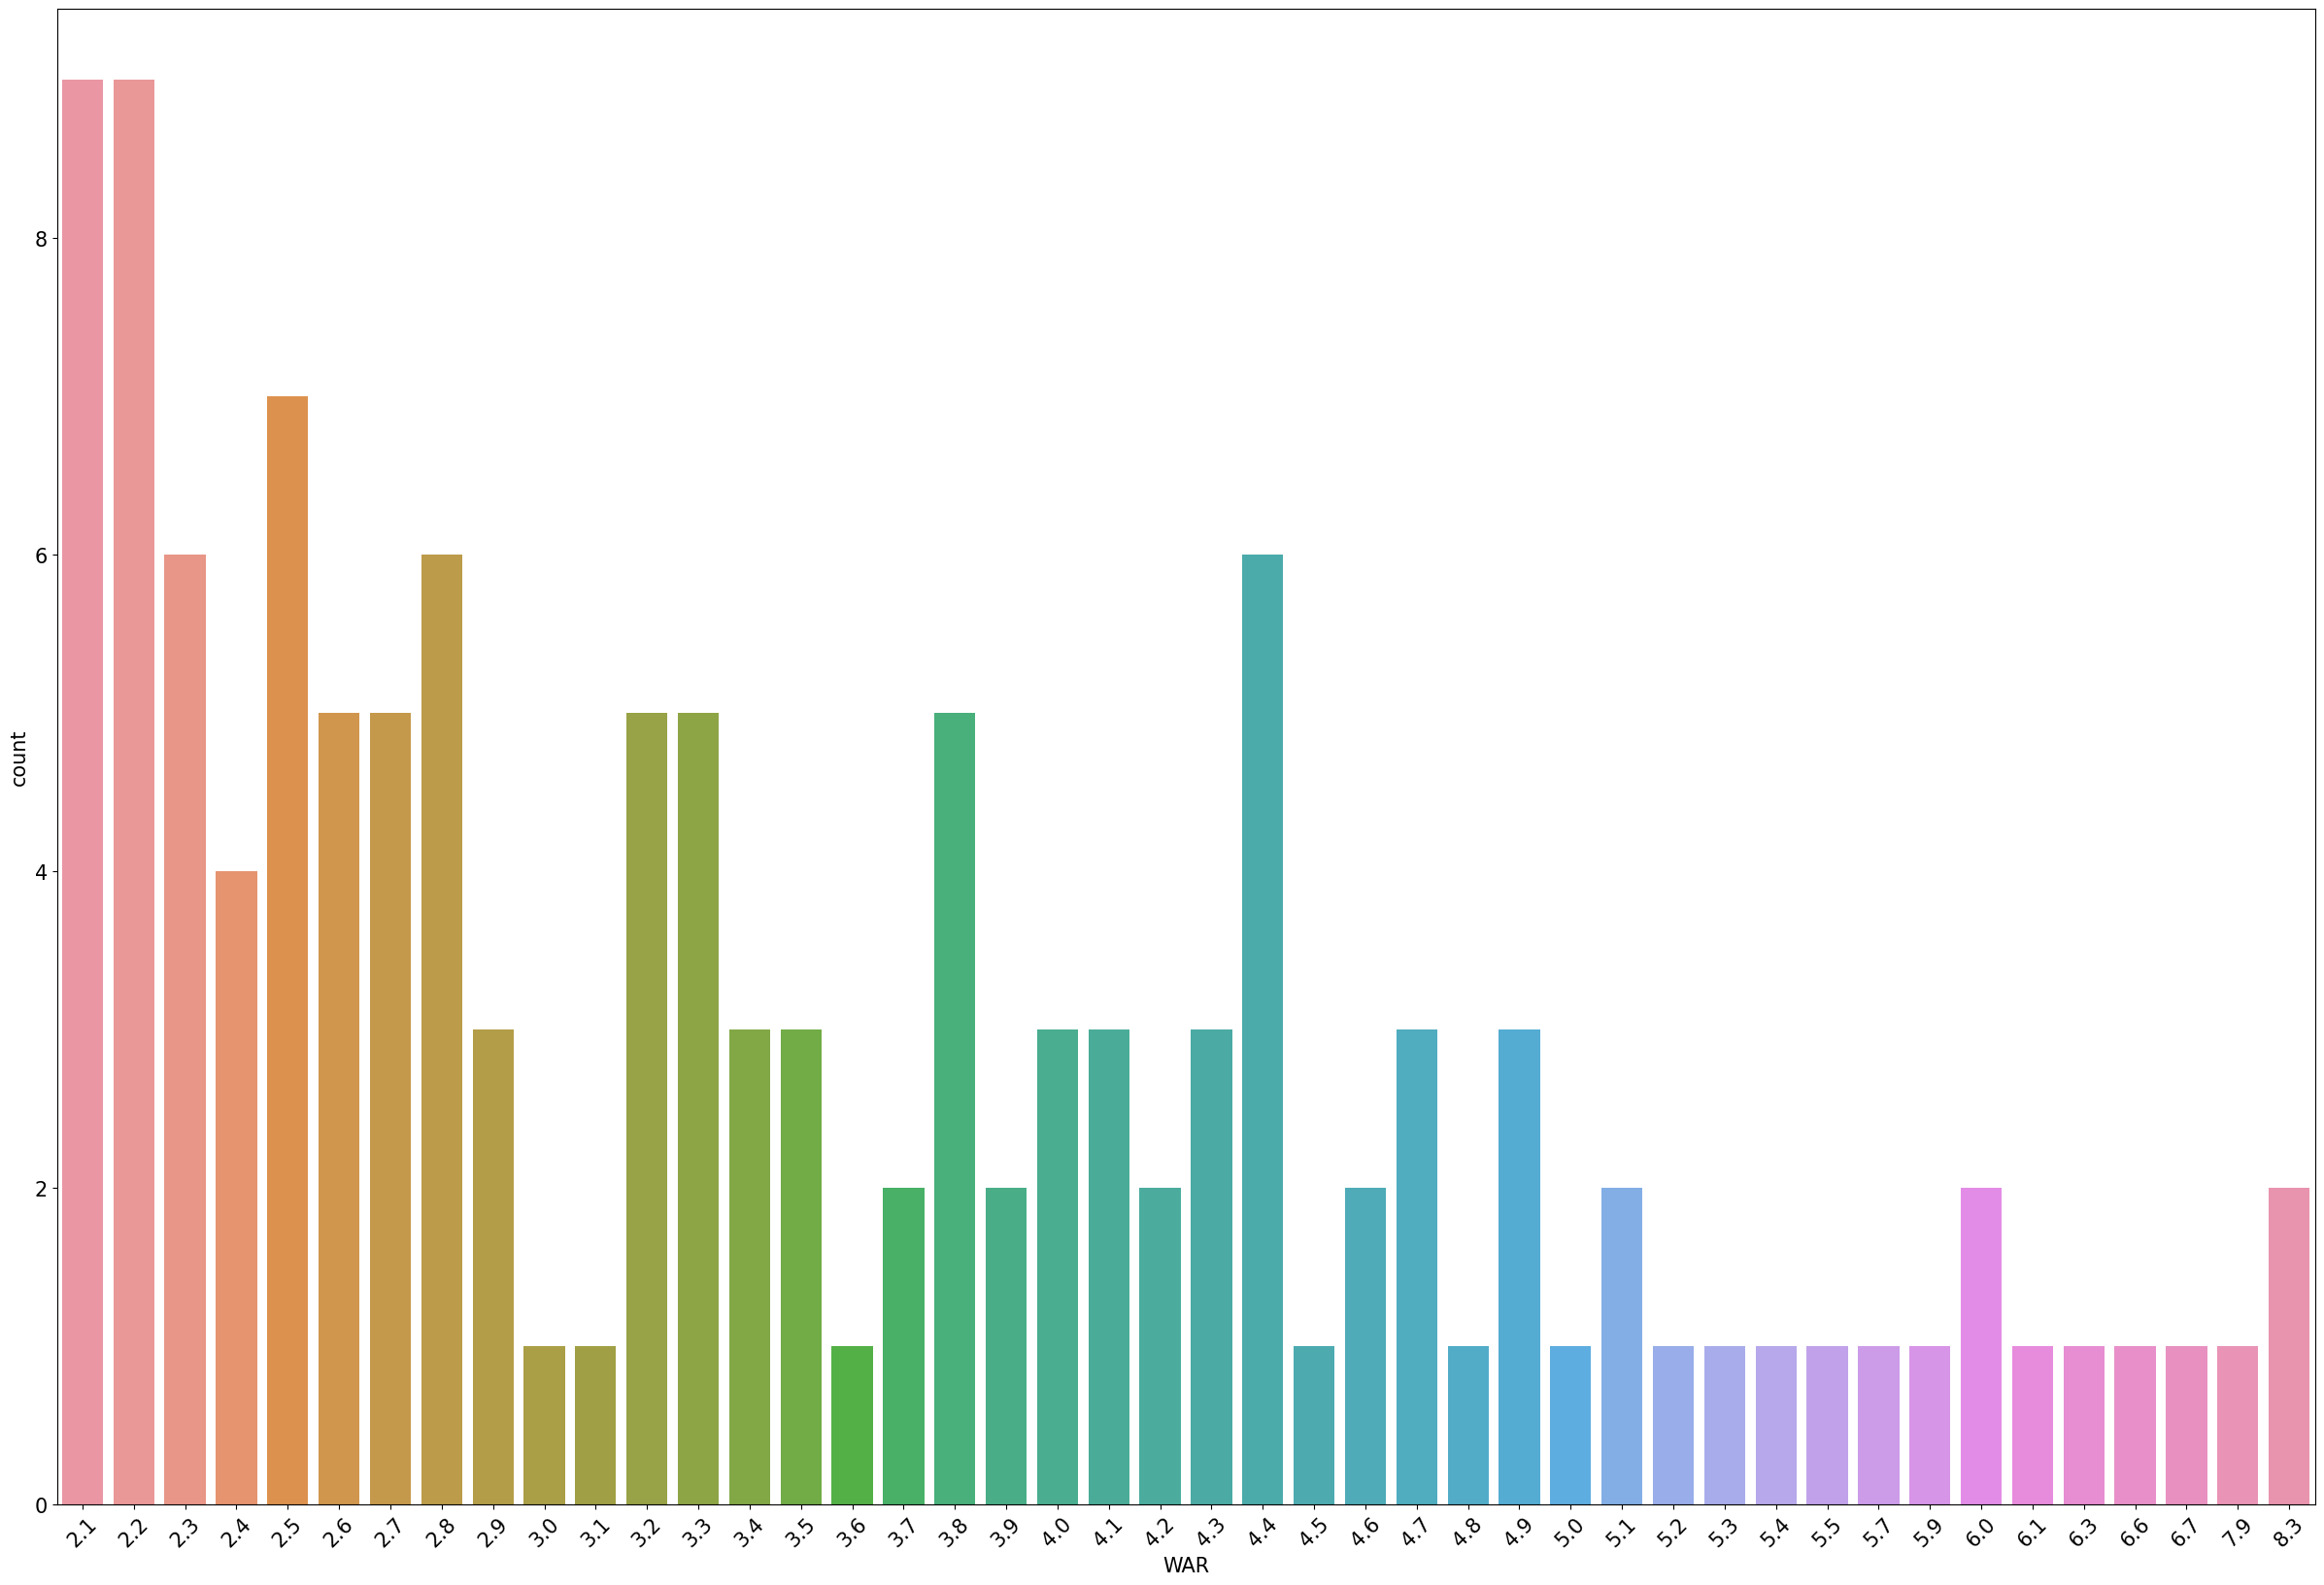

In [28]:
#Visualize frequency when WAR is greater than 4

df1=df[df['WAR'] > 2]

plt.figure(figsize=(30, 20))
plt.rcParams['font.size'] = 15
plt.xticks(rotation=45)
sns.countplot(x='WAR',data=df1)

                   WAR
G             0.592153
AB            0.655756
PA            0.676765
H             0.723380
1B            0.627610
...                ...
SFv           0.050105
Batting       0.822758
Base Running  0.335385
Fielding      0.355164
WAR           1.000000

[103 rows x 1 columns]


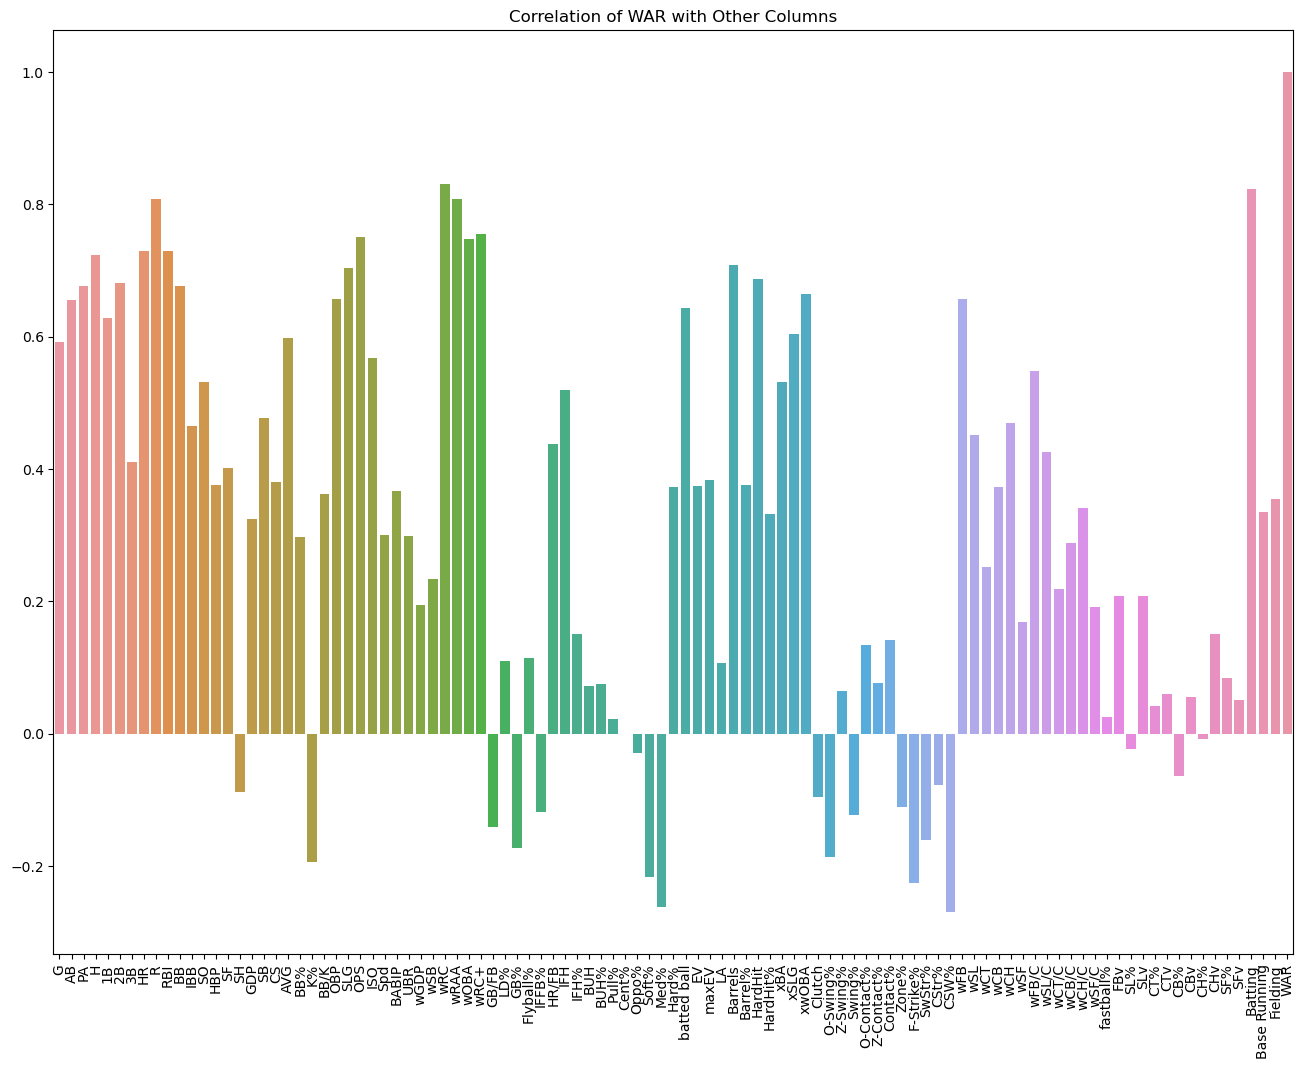

In [25]:
# Correlation with WAR
correlation_matrix = df.corr(numeric_only=True)
war_correlation = correlation_matrix[['WAR']]
print(war_correlation)

# visualize the correlations using a bar plot
plt.rcParams['font.size'] = 10
plt.figure(figsize=(16, 12))
sns.barplot(x=war_correlation.index, y=war_correlation.values)
plt.xticks(rotation=90)
plt.title('Correlation of WAR with Other Columns')
plt.show()

In [19]:
# Extract the features with correlation to 'WAR' greater than 0.7
high_correlation_features = correlation_matrix.columns[correlation_matrix['WAR'] > 0.7]
print(high_correlation_features)

# Extract only columns with correlation greater than 0.7 with WAR
correlation_matrix[correlation_matrix['WAR'] > 0.7][['WAR']]

Index(['H', 'HR', 'R', 'RBI', 'SLG', 'OPS', 'wRC', 'wRAA', 'wOBA', 'wRC+',
       'Barrels', 'Batting', 'WAR'],
      dtype='object')


,WAR
H,0.723380
HR,0.729618
R,0.807554
RBI,0.730223
SLG,0.704668
OPS,0.750966
wRC,0.830320
wRAA,0.808097
wOBA,0.747118
wRC+,0.755879


In [21]:
# Statistics for columns with correlation with WAR greater than 0.7
selected_features = ['H', 'HR', 'R', 'RBI', 'SLG', 'OPS', 'wRC', 'wRAA', 'wOBA', 'wRC+',
       'Barrels', 'Batting', 'WAR']
df_subset=df[selected_features]
df_subset.describe()

,H,HR,R,RBI,SLG,OPS,wRC,wRAA,wOBA,wRC+,Barrels,Batting,WAR
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,85.121475,12.368764,46.676790,45.028200,0.400998,0.714577,47.240781,0.863991,0.310679,94.952278,21.101952,0.955965,1.275488
std,45.980601,9.674632,27.268984,26.945462,0.076169,0.105525,30.426043,12.855483,0.041048,28.324016,16.007349,13.043989,1.762824
min,13.000000,0.000000,6.000000,5.000000,0.168000,0.322000,-3.000000,-26.200000,0.145000,-17.000000,0.000000,-30.600000,-2.000000
25%,47.000000,5.000000,24.000000,24.000000,0.351000,0.646000,22.000000,-7.200000,0.285000,78.000000,8.000000,-7.500000,0.000000
50%,78.000000,10.000000,43.000000,40.000000,0.400000,0.714000,40.000000,-1.900000,0.312000,96.000000,17.000000,-1.500000,0.900000
75%,120.000000,18.000000,65.000000,64.000000,0.453000,0.788000,68.000000,6.500000,0.340000,114.000000,30.000000,7.400000,2.200000
max,217.000000,54.000000,149.000000,139.000000,0.654000,1.066000,156.000000,66.700000,0.433000,180.000000,86.000000,64.100000,8.300000


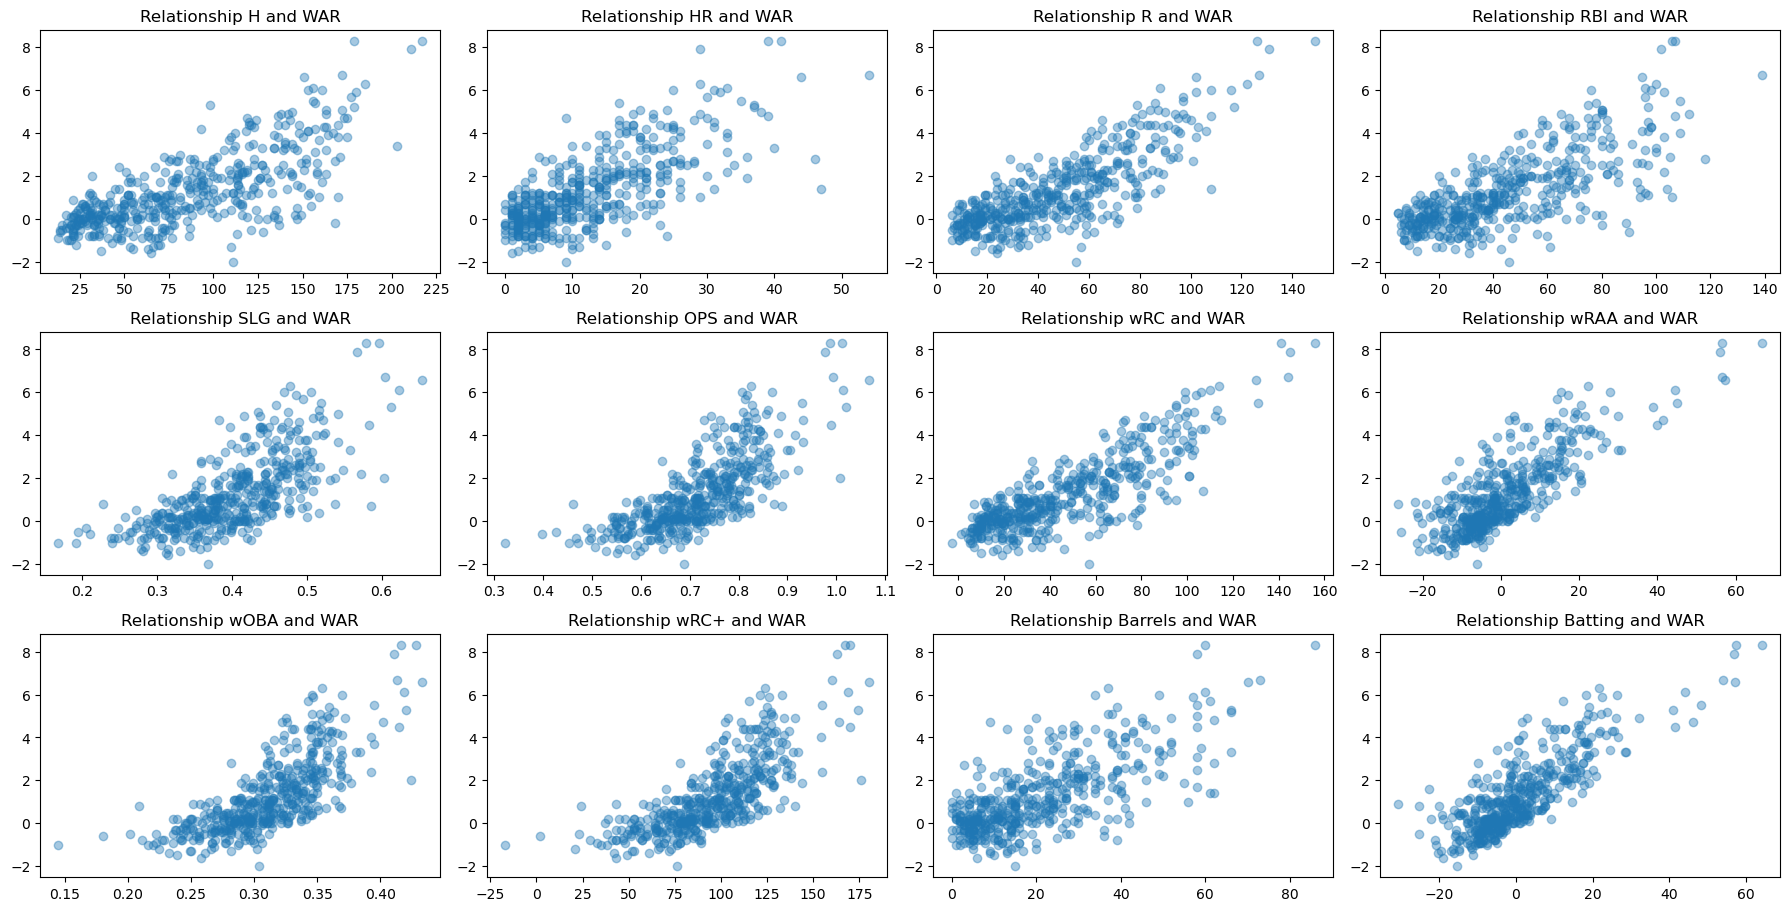

In [24]:
# Visualize a scatter plot  of extracted columns and WAR
selected_features_drop_WAR= ['H', 'HR', 'R', 'RBI', 'SLG', 'OPS', 'wRC', 'wRAA', 'wOBA', 'wRC+',
       'Barrels', 'Batting']
df_subset_drop_WAR=df[selected_features_drop_WAR]

plt.rcParams['font.size'] = 10
plt.figure(figsize=(18, 12))
for i, feature in enumerate(selected_features_drop_WAR):
    plt.subplot(4, 4, i+1)
    plt.scatter(x=df_subset_drop_WAR[feature],y=df['WAR'],alpha=0.4)
    plt.title(f'Relationship {feature} and WAR')
    
plt.tight_layout()
plt.show()

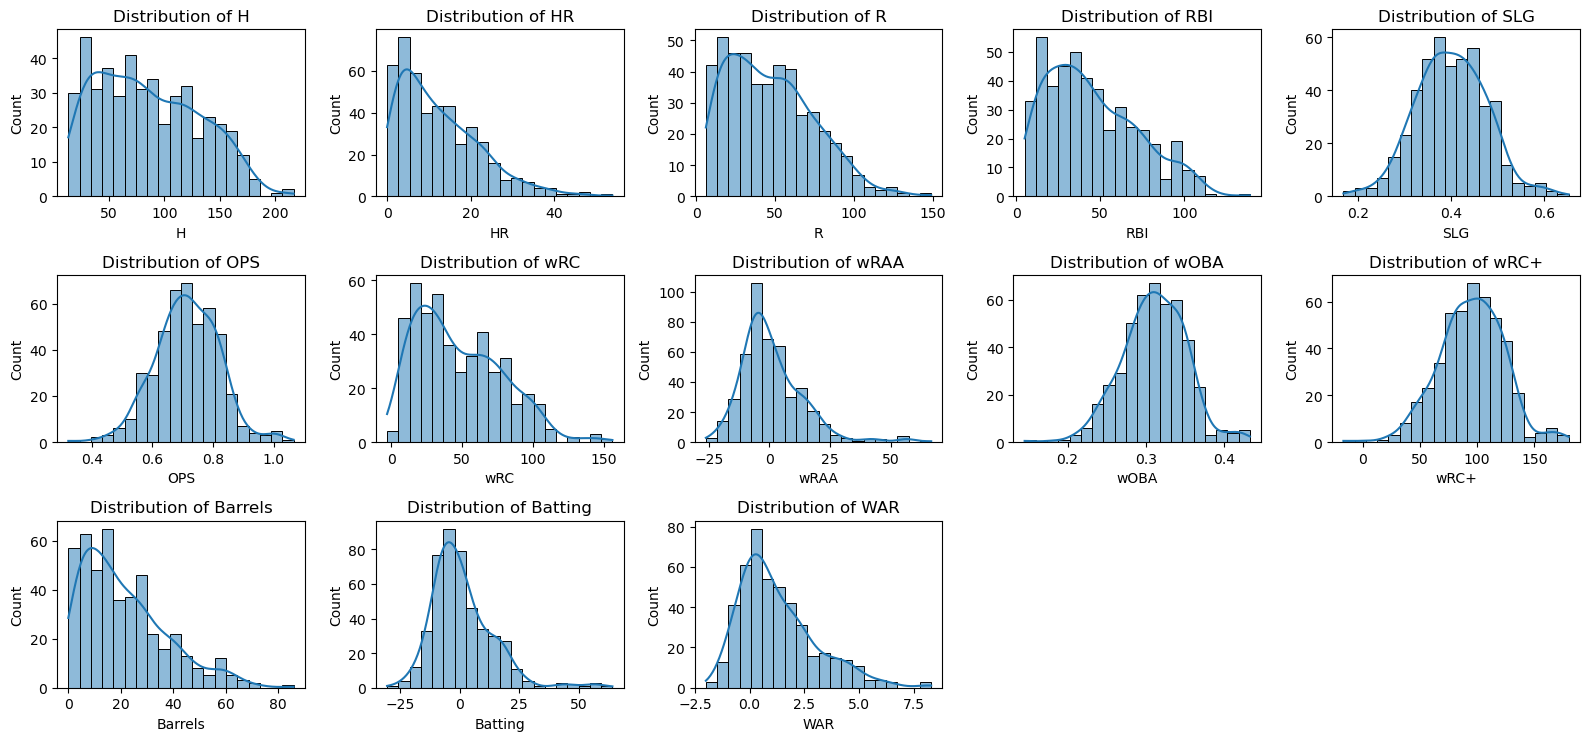

In [26]:
# Distribution Plots
plt.rcParams['font.size'] = 10
plt.figure(figsize=(16, 12))
for i, feature in enumerate(selected_features):
    plt.subplot(5, 5, i+1)
    sns.histplot(df_subset[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.show()

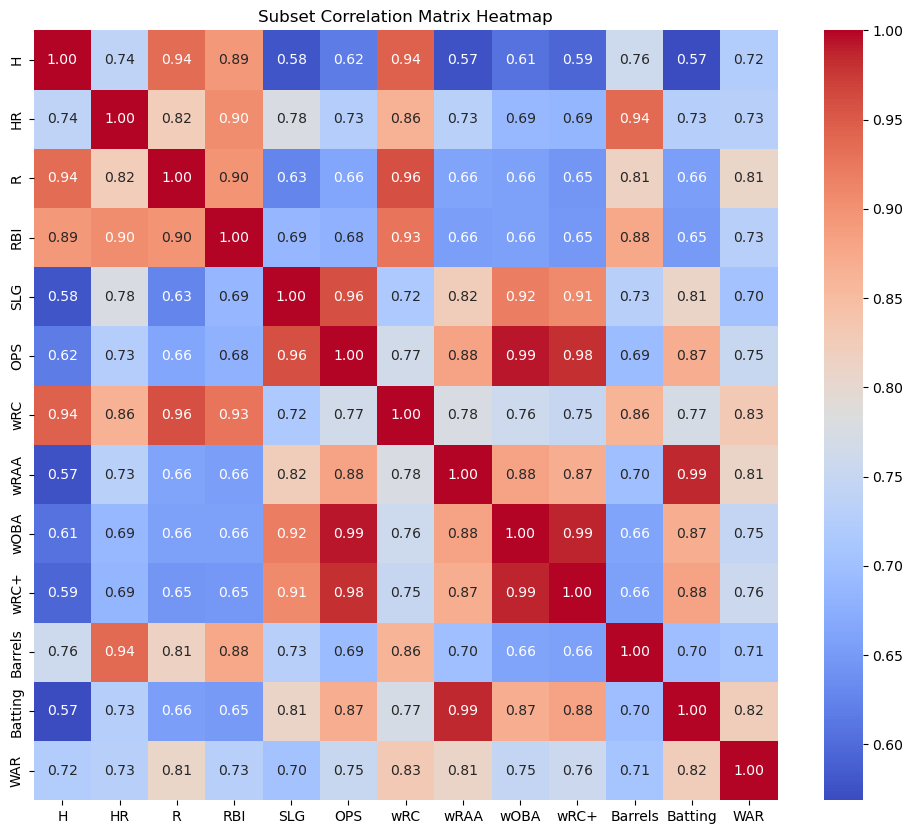

In [27]:
# Correlation Matrix Heatmap
plt.rcParams['font.size'] = 10
subset_correlation_matrix = df_subset.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(subset_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Subset Correlation Matrix Heatmap")
plt.show()


# Data analysis

### Building Regression Models

First test of linear regression model with all features excluding cagtegorical and low correlation features (< 0.4)

In [4]:
# Columns to exclude
columns_to_drop = ['Name', 'Team', 'HBP', 'SH', 'GDP', 'CS', 'BB%', 'K%', 'BB/K', 'Spd', 'BABIP', 'UBR', 
                      'wGDP', 'wSB', 'GB/FB', 'LD%', 'GB%', 'Flyball%', 'IFFB%', 'IFH%', 
                      'BUH', 'BUH%', 'Pull%', 'Cent%', 'Oppo%', 'Soft%', 'Med%', 'Hard%', 
                      'EV', 'maxEV', 'LA', 'Barrel%', 'HardHit%', 'Clutch', 'O-Swing%', 
                      'Z-Swing%', 'Swing%', 'O-Contact%', 'Z-Contact%', 'Contact%', 
                      'Zone%', 'F-Strike%', 'SwStr%', 'CStr%', 'CSW%', 'wCT', 'wCB', 
                      'wSF', 'wCT/C', 'wCB/C', 'wCH/C', 'wSF/C', 'fastball%', 'FBv', 
                      'SL%', 'SLv', 'CT%', 'CTv', 'CB%', 'CBv', 'CH%', 'CHv', 'SF%', 
                      'SFv', 'Base Running', 'Fielding','BB%', 'IFH%', 'xBA', 'Zone%', 
                      'G', 'RBI', 'HR/FB', 'IFH', 'Barrels', 'wSL', 'wSL/C']

# Select features and target variable
X = df.drop(['WAR'] + columns_to_drop, axis=1)
y = df['WAR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print('Coefficients:', coefficients)
print('Intercept:', intercept)

Mean Squared Error: 0.7438036727810117
Mean Absolute Error: 0.6453950510295433
R2 Score: 0.7180297029815021
Coefficients: [ 5.84570263e-02 -1.04331593e-01 -1.93303894e-01  3.01573627e-02
 -1.82199181e-02 -3.84386877e-02 -1.66802639e-01  2.79788318e-02
  8.28138713e-03  5.30013634e-02  9.35306962e-02  9.63359957e-02
  2.94680274e-02 -4.58382375e+00  8.31388160e+01  8.46422360e+01
 -9.02470703e+01 -4.10413755e+00  1.07689756e-01 -1.99207804e-02
  4.02363828e+01 -2.25492739e-02  9.11972338e-02 -4.29866447e-03
  4.19857371e+00 -7.18328332e+00  3.40901744e-02  5.24336677e-02
 -1.26933226e-01  1.89839944e-01]
Intercept: -3.6625102545203396


## Linear Regression

In [43]:
# TEST CODE ADDED TO REMOVE HIGH INFLUENCE ROWS (FROM OUTLIER ANALYSIS)
# Deemed unnessary due to low impact results
# rows_to_remove = [199, 326]
# df = df.drop(rows_to_remove, axis=0)

In [25]:
# Select features and target variable
selected_features = ['H', 'HR', 'R', 'RBI', 'SLG', 'OPS', 'wRC', 'wRAA', 'wOBA', 'wRC+',
       'Barrels', 'Batting']
X = df[selected_features]
y = df['WAR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

# Get the coefficients and intercept
coefficients = lr_model.coef_
intercept = lr_model.intercept_

# Print the coefficients and intercept
print('Coefficients:', coefficients)
print('Intercept:', intercept)

Root Mean Squared Error: 0.8032322885640439
Mean Squared Error: 0.6451821093918316
Mean Absolute Error: 0.5888404252432916
R2 Score: 0.7554163851651259
Coefficients: [ 8.92060973e-03 -1.49114334e-02  4.92929461e-02 -2.05989087e-03
  7.88262329e+00 -1.14918222e+01 -3.19173244e-02 -8.90690724e-02
  3.06548741e+01 -1.95110408e-02 -3.98485264e-03  1.81853603e-01]
Intercept: -2.656942920702873


In [9]:
# Zip coefficients with corresponding feature names
coef_feature_pairs = list(zip(coefficients, X.columns))

# Sort the list based on the absolute values of coefficients in descending order
sorted_coef_feature_pairs = sorted(coef_feature_pairs, key=lambda x: abs(x[0]), reverse=True)

# Print the sorted coefficients and corresponding features
for coef, feature in sorted_coef_feature_pairs:
    print("Linear", f'{feature}: {coef}')

Linear wOBA: 30.654874070587194
Linear OPS: -11.491822181736797
Linear SLG: 7.882623291564469
Linear Batting: 0.18185360286961263
Linear wRAA: -0.0890690724485791
Linear R: 0.04929294612007709
Linear wRC: -0.031917324371600664
Linear wRC+: -0.01951104078958332
Linear HR: -0.014911433352540549
Linear H: 0.008920609728728488
Linear Barrels: -0.003984852640943751
Linear RBI: -0.0020598908670924924


In [10]:
print("Training set accuracy: {:.3f}".format(lr_model.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(lr_model.score(X_test, y_test)))

Training set accuracy: 0.827
Test set accuracy: 0.755


### LASSO

In [24]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

selected_features = ['H', 'HR', 'R', 'RBI', 'SLG', 'OPS', 'wRC', 'wRAA', 'wOBA', 'wRC+',
       'Barrels', 'Batting']
X = df[selected_features]
y = df['WAR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Lasso Regression model with regularization parameter alpha
lasso_model = Lasso(alpha=0.1, max_iter=10000)  # Increase max_iter as needed

# Train the Lasso model
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso model performance
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
# Calculate Root Mean Squared Error (RMSE)
rmse_lasso = np.sqrt(mse_lasso)
print(f'Root Mean Squared Error: {rmse_lasso}')
print(f'Mean Squared Error: {mse_lasso}')
print(f'Mean Absolute Error: {mae_lasso}')
print(f'R2 Score: {r2_lasso}')

# Get the coefficients and intercept
coefficients = lasso_model.coef_
intercept = lasso_model.intercept_

# Print the coefficients and intercept
print('Coefficients:', coefficients)
print('Intercept:', intercept)

Root Mean Squared Error: 0.781070199548168
Mean Squared Error: 0.610070656622215
Mean Absolute Error: 0.584469336428498
R2 Score: 0.7687268690044744
Coefficients: [ 0.00879695 -0.          0.04566492 -0.00328776  0.         -0.
 -0.03117152 -0.00326419 -0.          0.00263773 -0.00111004  0.090108  ]
Intercept: -0.3173306063301824


In [6]:
# Zip coefficients with corresponding feature names
coef_feature_pairs = list(zip(coefficients, X.columns))

# Sort the list based on the absolute values of coefficients in descending order
sorted_coef_feature_pairs = sorted(coef_feature_pairs, key=lambda x: abs(x[0]), reverse=True)

# Print the sorted coefficients and corresponding features
for coef, feature in sorted_coef_feature_pairs:
    print(f'{feature}: {coef}')

Batting: 0.09010800124559874
R: 0.04566491795617849
wRC: -0.03117152079742604
H: 0.00879694775547583
RBI: -0.003287758356382131
wRAA: -0.0032641937687765315
wRC+: 0.0026377333704465187
Barrels: -0.0011100409631155355
HR: -0.0
SLG: 0.0
OPS: -0.0
wOBA: -0.0


In [7]:
print("Training set accuracy: {:.3f}".format(lasso_model.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(lasso_model.score(X_test, y_test)))

Training set accuracy: 0.822
Test set accuracy: 0.769


## RIDGE (Chosen model)

Coefficients make more 'real-word' sense

There needs to be at least a little bit of error in order to add meaning to our predicted 'WAR'. If our model had little error, our predicted 'WAR' would be too similar to the actual 'WAR' values, making it more difficult to decide between players with the same 'WAR'.

In [20]:
from sklearn.linear_model import Ridge

selected_features = ['H', 'HR', 'R', 'RBI', 'SLG', 'OPS', 'wRC', 'wRAA', 'wOBA', 'wRC+',
       'Barrels', 'Batting']
X = df[selected_features]
y = df['WAR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge Regression model with regularization parameter alpha
ridge_model = Ridge(alpha=0.1)  # Adjust alpha as needed

# Train the Ridge model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)
# Calculate Root Mean Squared Error (RMSE)
rmse_ridge = np.sqrt(mse_ridge)
print(f'Root Mean Squared Error (Ridge): {rmse_ridge}')
print(f'Mean Squared Error (Ridge): {mse_ridge}')
print(f'Mean Absolute Error: {mae_ridge}')
print(f'R2 Score: {r2_ridge}')


# Get the coefficients and intercept
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_

# Print the coefficients and intercept
print('Coefficients:', coefficients)
print('Intercept:', intercept)

Root Mean Squared Error (Ridge): 0.7998249572852065
Mean Squared Error (Ridge): 0.6397199622962824
Mean Absolute Error: 0.5888404252432916
R2 Score: 0.7554163851651259
Coefficients: [ 0.01025782 -0.00460926  0.04979735 -0.00272418  1.49021027  0.57035429
 -0.03688162 -0.05995301  0.2400322  -0.00372128 -0.00389662  0.1525939 ]
Intercept: -0.7636293654768944


In [18]:
# Zip coefficients with corresponding feature names
coef_feature_pairs = list(zip(coefficients, X.columns))

# Sort the list based on the absolute values of coefficients in descending order
sorted_coef_feature_pairs = sorted(coef_feature_pairs, key=lambda x: abs(x[0]), reverse=True)

# Print the sorted coefficients and corresponding features
for coef, feature in sorted_coef_feature_pairs:
    print("ridge", f'{feature}: {coef}')

ridge SLG: 1.4902102655820446
ridge OPS: 0.5703542933467222
ridge wOBA: 0.2400322009001304
ridge Batting: 0.15259390054619842
ridge wRAA: -0.05995301220905579
ridge R: 0.049797350361709264
ridge wRC: -0.03688161866254072
ridge H: 0.010257816724129154
ridge HR: -0.004609255237455193
ridge Barrels: -0.0038966205540999057
ridge wRC+: -0.003721278046407559
ridge RBI: -0.0027241832093345213


In [19]:
print("Training set accuracy: {:.3f}".format(ridge_model.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(ridge_model.score(X_test, y_test)))

Training set accuracy: 0.826
Test set accuracy: 0.757


Unique value counts for WAR greater than 2 - list of WAR values that multiple players have. We will use values with the same WAR to test ouer model and predict our own WAR

In [40]:
target_war_value = 8.3  # Replace with any target 'WAR' value

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Extract players with the same 'WAR' value using boolean indexing
players_same_war = df[df['WAR'] == target_war_value].copy()

# Extract features for prediction
X_same_war = players_same_war[X.columns]

# Make predictions using the trained model
predictions = lr_model.predict(X_same_war)

# Add the predictions to the DataFrame using .loc to avoid SettingWithCopyWarning
players_same_war.loc[:, 'Predicted_WAR'] = predictions

# Sort the results in descending order of predicted 'WAR'
sorted_results = players_same_war.sort_values(by='Predicted_WAR', ascending=False)

# Extract 'Player_Name' from the original DataFrame
sorted_results_with_names = sorted_results.merge(df[['Name']], on='Name')

# Display the sorted results with player names
print(sorted_results_with_names[['Name', 'WAR', 'Predicted_WAR']])

               Name  WAR  Predicted_WAR
0  Ronald Acuña Jr.  8.3       9.059599
1      Mookie Betts  8.3       7.712872


Comparing real player data to our predicted 'WAR' results

In [41]:
# Swap 'Name' value with any player we want to extract real data from
print(df[df['Name'] == 'Mookie Betts'][['H', 'HR', 'R', 'RBI', 'SLG', 'OPS', 'wRC', 'wRAA', 'wOBA', 'wRC+',
       'Barrels', 'Batting']])

       H  HR    R  RBI    SLG    OPS  wRC  wRAA   wOBA  wRC+  Barrels  Batting
136  179  39  126  107  0.579  0.987  141  56.5  0.416   167       60     57.3


In [42]:
# Swap 'Name' value with any player we want to extract real data from
print(df[df['Name'] == 'Ronald Acuña Jr.'][['H', 'HR', 'R', 'RBI', 'SLG', 'OPS', 'wRC', 'wRAA', 'wOBA', 'wRC+',
       'Barrels', 'Batting']])

      H  HR    R  RBI    SLG    OPS  wRC  wRAA   wOBA  wRC+  Barrels  Batting
84  217  41  149  106  0.596  1.012  156  66.7  0.428   170       86     64.1
